<a href="https://colab.research.google.com/github/emmabui2911/Data-Analyst-Project2-Prediction-of-employee-attrition/blob/main/Prediction-of-employee-attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
general_data=pd.read_csv('/content/general_data.csv')
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
employee_survey_data= pd.read_csv('/content/employee_survey_data.csv')
employee_survey_data.head() 

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [ ]:
manager_survey_data = pd.read_csv('/content/manager_survey_data.csv')
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


# EDA dữ liệu

In [ ]:
#nhập các cột lại với nhau
main_data = general_data.join([manager_survey_data.drop('EmployeeID',axis=1),
                             employee_survey_data.drop('EmployeeID',axis=1)])
main_data.head()
main_data.drop('EmployeeID',axis=1,inplace=True)
main_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,1,...,10.0,5,3,0,2,3,3,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,1,...,10.0,2,3,0,2,2,3,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,2,...,5.0,4,4,1,2,3,4,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,1,...,10.0,2,9,7,8,2,3,4.0,1.0,3.0


In [ ]:
#check thông tin các cột
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  Over18                  

In [ ]:
#check giá trị null
main_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [ ]:
#thay các giá trị null bằng giá trị mean của cột
main_data["NumCompaniesWorked"].replace(np.nan,"%.2f" % main_data['NumCompaniesWorked'].astype('float').mean(axis=0), inplace=True)
main_data["TotalWorkingYears"].replace(np.nan,"%.2f" % main_data['TotalWorkingYears'].astype('float').mean(axis=0), inplace=True)
main_data["EnvironmentSatisfaction"].replace(np.nan,"%.2f" % main_data['EnvironmentSatisfaction'].astype('float').mean(axis=0), inplace=True)
main_data["JobSatisfaction"].replace(np.nan,"%.2f" % main_data['JobSatisfaction'].astype('float').mean(axis=0), inplace=True)
main_data["WorkLifeBalance"].replace(np.nan,"%.2f" % main_data['WorkLifeBalance'].astype('float').mean(axis=0), inplace=True)

In [ ]:
#kiểm tra lại thông tin cột sau khi thay
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4410 non-null   int64 
 1   Attrition                4410 non-null   object
 2   BusinessTravel           4410 non-null   object
 3   Department               4410 non-null   object
 4   DistanceFromHome         4410 non-null   int64 
 5   Education                4410 non-null   int64 
 6   EducationField           4410 non-null   object
 7   EmployeeCount            4410 non-null   int64 
 8   Gender                   4410 non-null   object
 9   JobLevel                 4410 non-null   int64 
 10  JobRole                  4410 non-null   object
 11  MaritalStatus            4410 non-null   object
 12  MonthlyIncome            4410 non-null   int64 
 13  NumCompaniesWorked       4410 non-null   object
 14  Over18                   4410 non-null  

In [ ]:
#xóa những cột không cần thiết
main_data.drop(['EmployeeCount','Over18',
                'PercentSalaryHike','StandardHours','StockOptionLevel'],axis=1, inplace= True)
main_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,10.0,5,3,0,2,3,3,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,10.0,2,3,0,2,2,3,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,5.0,4,4,1,2,3,4,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,10.0,2,9,7,8,2,3,4.0,1.0,3.0


In [ ]:
#decoding dữ liệu
main_data['Education'].replace(to_replace = ['Below College','College','Bachelor','Master','Doctor'], value = [1,2,3,4,5], inplace =True)

In [ ]:
main_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,10.0,5,3,0,2,3,3,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,10.0,2,3,0,2,2,3,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,5.0,4,4,1,2,3,4,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,10.0,2,9,7,8,2,3,4.0,1.0,3.0


In [ ]:
main_data['JobSatisfaction'].value_counts(ascending=False)


4.0     1367
3.0     1323
1.0      860
2.0      840
2.73      20
Name: JobSatisfaction, dtype: int64

<Axes: xlabel='JobSatisfaction', ylabel='count'>

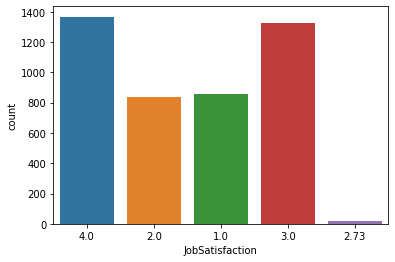

In [ ]:
sns.countplot(x='JobSatisfaction',data=main_data)

In [ ]:
main_data['WorkLifeBalance'].value_counts(ascending=False)

3.0     2660
2.0     1019
4.0      454
1.0      239
2.76      38
Name: WorkLifeBalance, dtype: int64

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

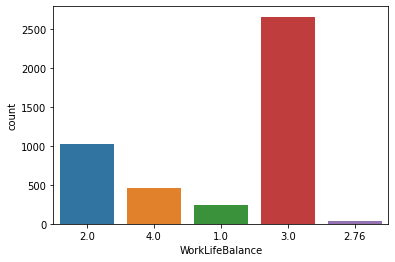

In [ ]:
sns.countplot(x='WorkLifeBalance',data=main_data)

In [ ]:
main_data['NumCompaniesWorked'].value_counts(ascending=False)

1.0     1558
0.0      586
3.0      474
2.0      438
4.0      415
7.0      222
6.0      208
5.0      187
9.0      156
8.0      147
2.69      19
Name: NumCompaniesWorked, dtype: int64

<Axes: xlabel='NumCompaniesWorked', ylabel='count'>

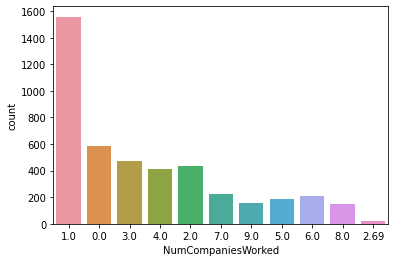

In [ ]:
sns.countplot(x='NumCompaniesWorked',data=main_data)

In [ ]:
main_data['TotalWorkingYears'].value_counts(ascending=False)

10.0     605
6.0      375
8.0      307
9.0      287
5.0      264
7.0      243
1.0      242
4.0      189
12.0     144
3.0      126
15.0     120
16.0     111
13.0     108
11.0     106
21.0     102
17.0      99
14.0      93
2.0       93
20.0      89
18.0      81
19.0      66
23.0      66
22.0      62
24.0      54
26.0      42
28.0      42
25.0      42
0.0       33
29.0      30
31.0      27
32.0      27
27.0      21
30.0      21
33.0      21
36.0      18
34.0      15
37.0      12
35.0       9
11.28      9
40.0       6
38.0       3
Name: TotalWorkingYears, dtype: int64

<ipython-input-342-125c05224271>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(main_data['TotalWorkingYears'], hist=True, kde=False,


Text(0.5, 0, 'TotalWorkingYears')

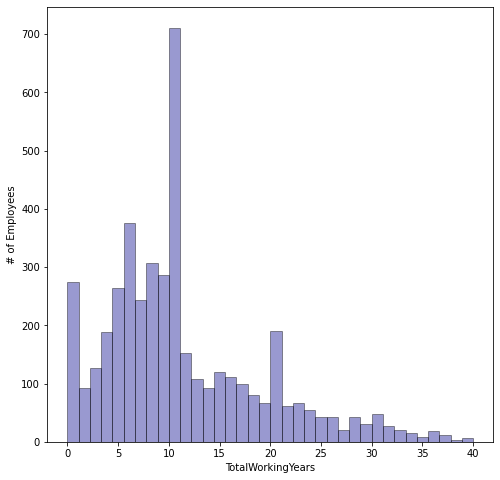

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.distplot(main_data['TotalWorkingYears'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Employees')
ax.set_xlabel('TotalWorkingYears')

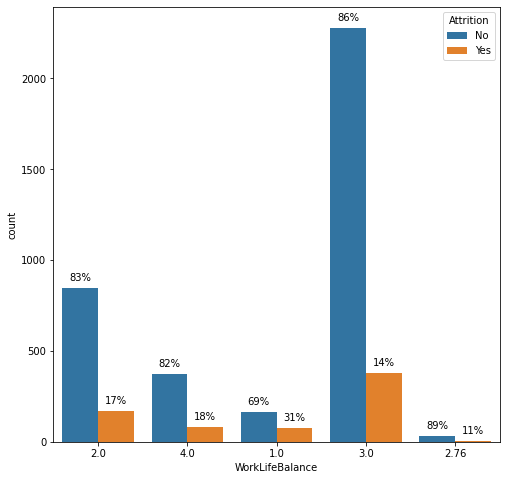

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='WorkLifeBalance',data=main_data,hue="Attrition")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")


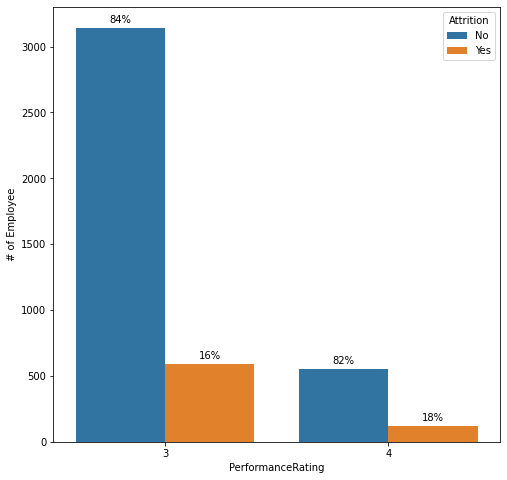

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='PerformanceRating', data=main_data, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

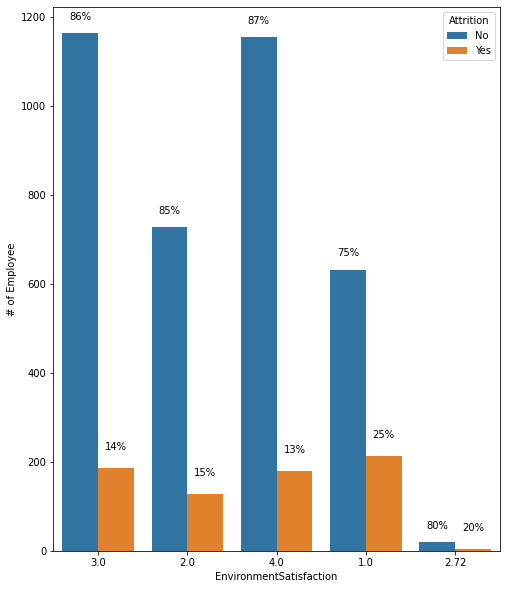

In [ ]:
plt.figure(figsize=(8,10))
ax = sns.countplot(x='EnvironmentSatisfaction', data=main_data, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 30, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

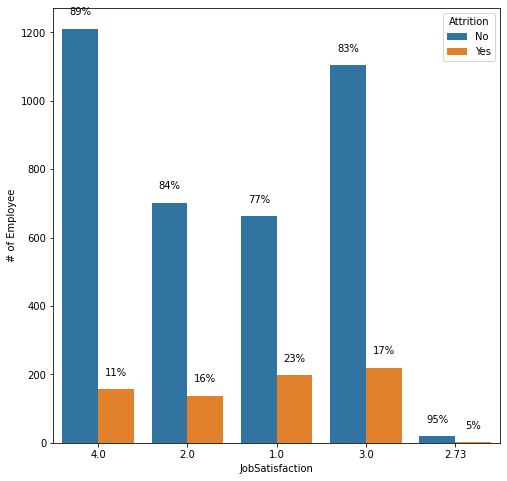

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='JobSatisfaction', data=main_data, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

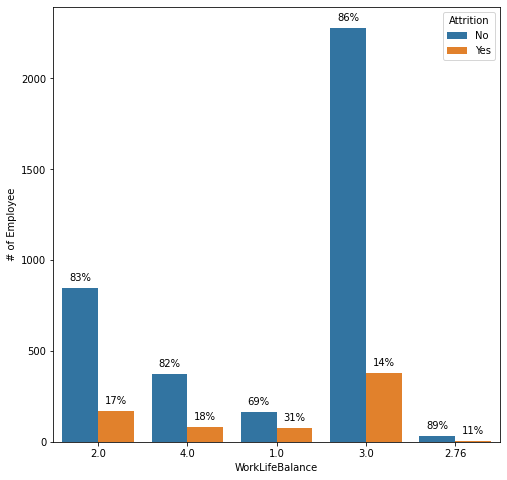

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='WorkLifeBalance', data=main_data, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

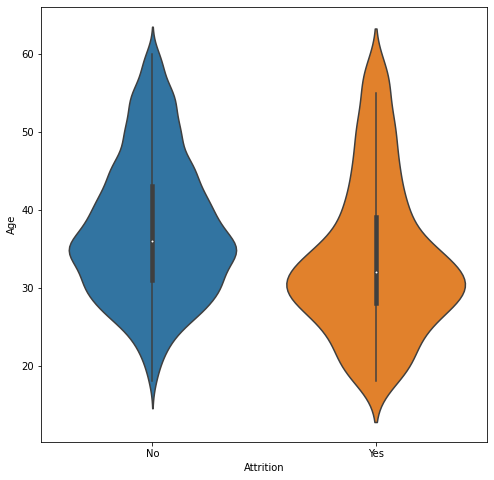

In [ ]:
plt.figure(figsize=(8,8))
sns.violinplot(y='Age',x='Attrition',data=main_data)
plt.show()

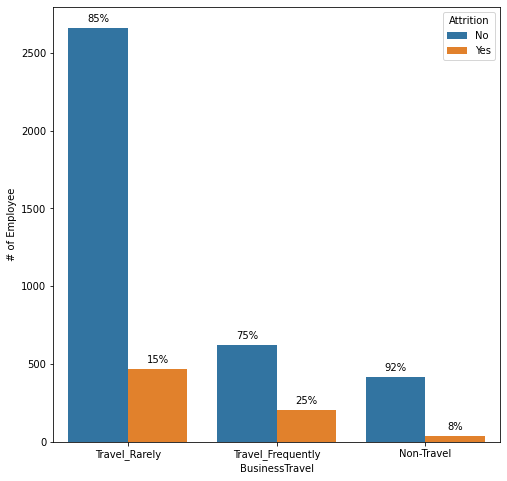

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='BusinessTravel', data=main_data, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

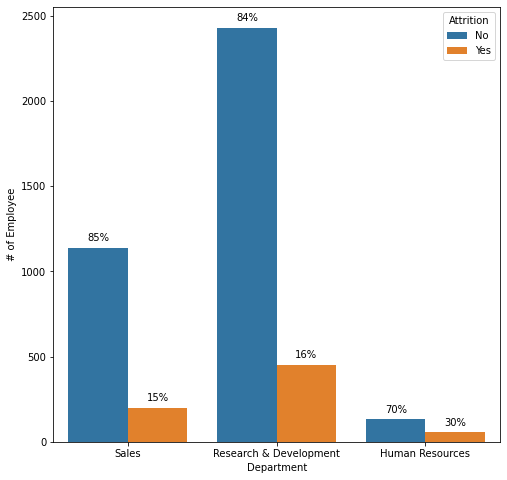

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Department', data=main_data, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")


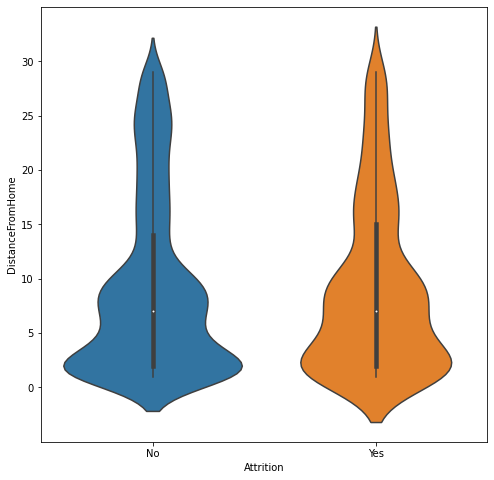

In [ ]:
plt.figure(figsize=(8,8))
sns.violinplot(y='DistanceFromHome',x='Attrition',data=main_data)

plt.show()

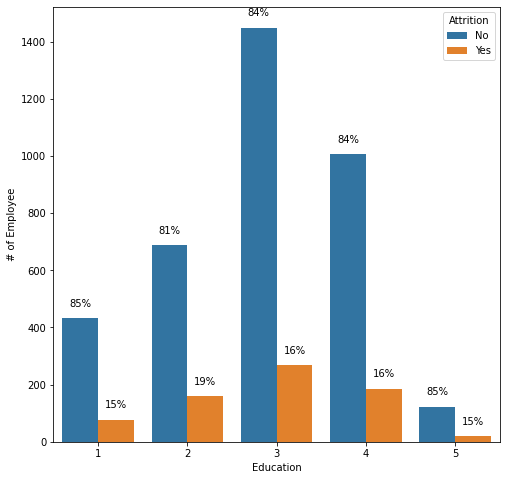

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Education', data=main_data, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

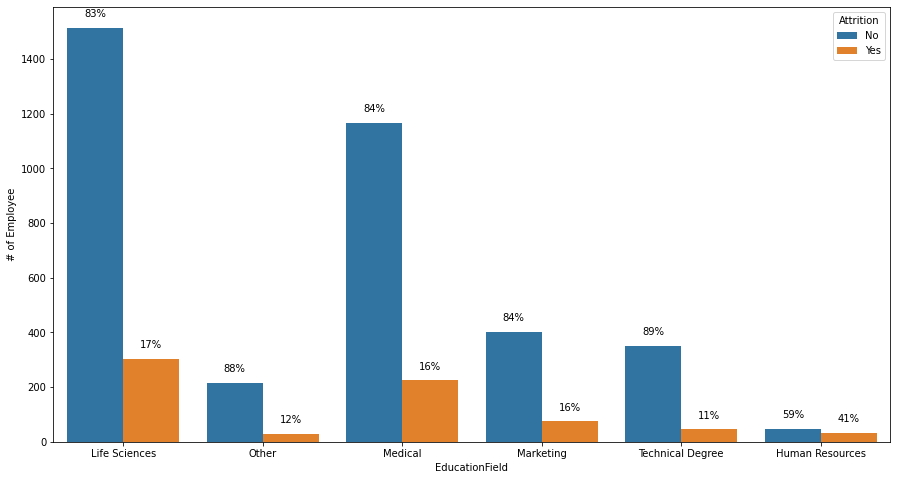

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='EducationField', data=main_data, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

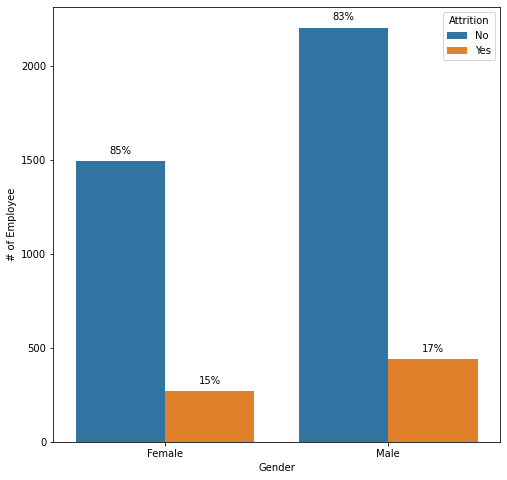

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Gender', data=main_data, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

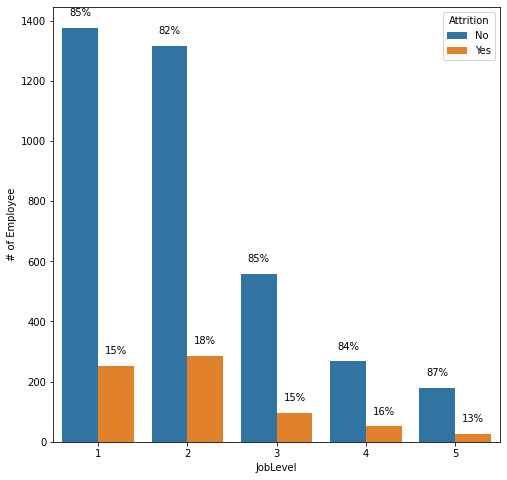

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='JobLevel', data=main_data, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")


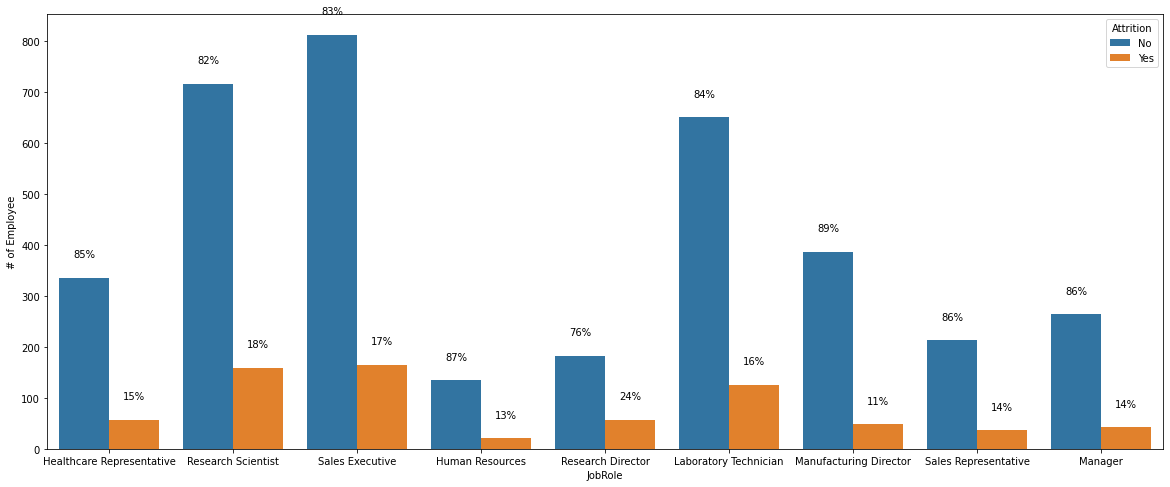

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='JobRole', data=main_data, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

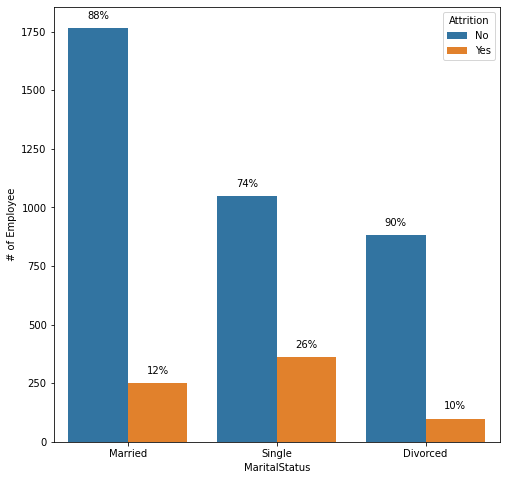

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='MaritalStatus', data=main_data, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

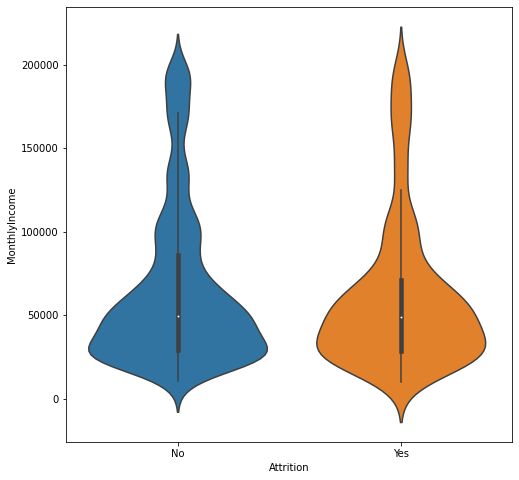

In [ ]:
plt.figure(figsize=(8,8))
sns.violinplot(y='MonthlyIncome',x='Attrition',data=main_data)

plt.show()

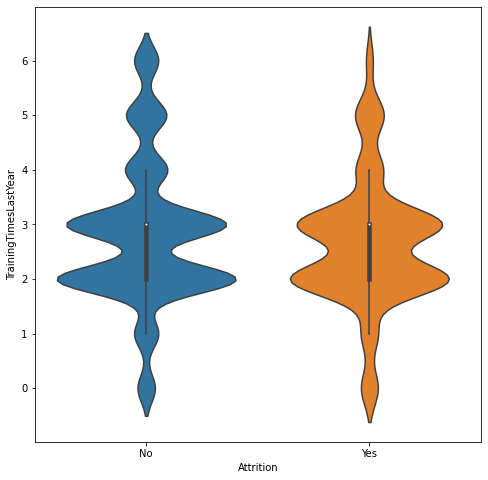

In [ ]:
plt.figure(figsize=(8,8))
sns.violinplot(y='TrainingTimesLastYear',x='Attrition',data=main_data)

plt.show()

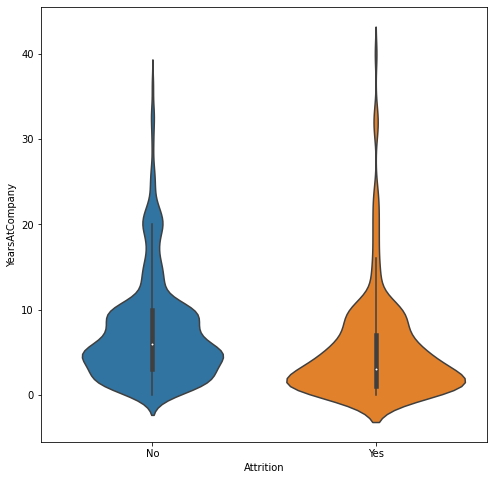

In [ ]:
plt.figure(figsize=(8,8))
sns.violinplot(y='YearsAtCompany',x='Attrition',data=main_data)

plt.show()

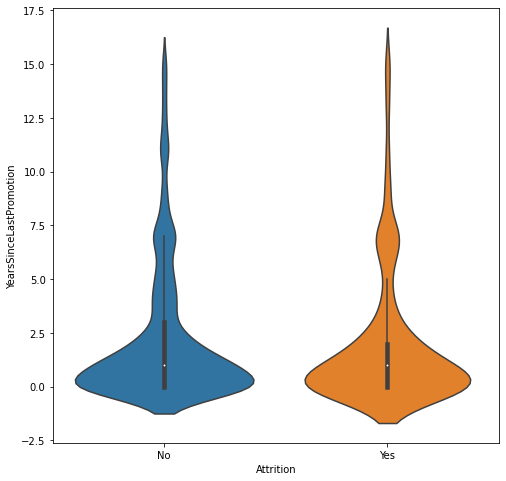

In [ ]:
plt.figure(figsize=(8,8))
sns.violinplot(y='YearsSinceLastPromotion',x='Attrition',data=main_data)

plt.show()

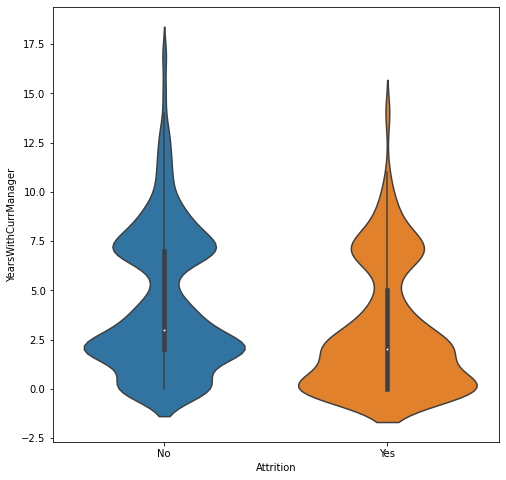

In [ ]:
plt.figure(figsize=(8,8))
sns.violinplot(y='YearsWithCurrManager',x='Attrition',data=main_data)

plt.show()

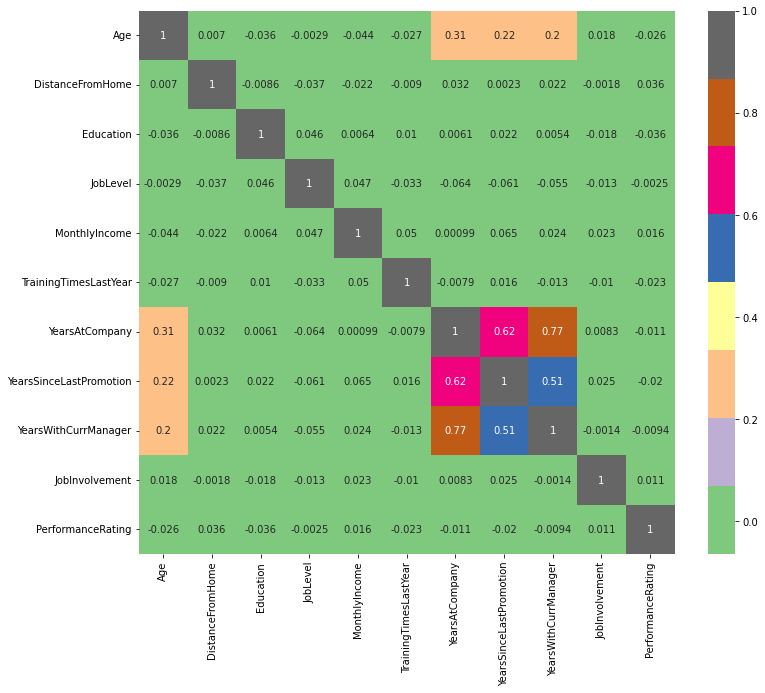

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(main_data.corr(), annot = True, cmap = "Accent");

In [ ]:

# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872


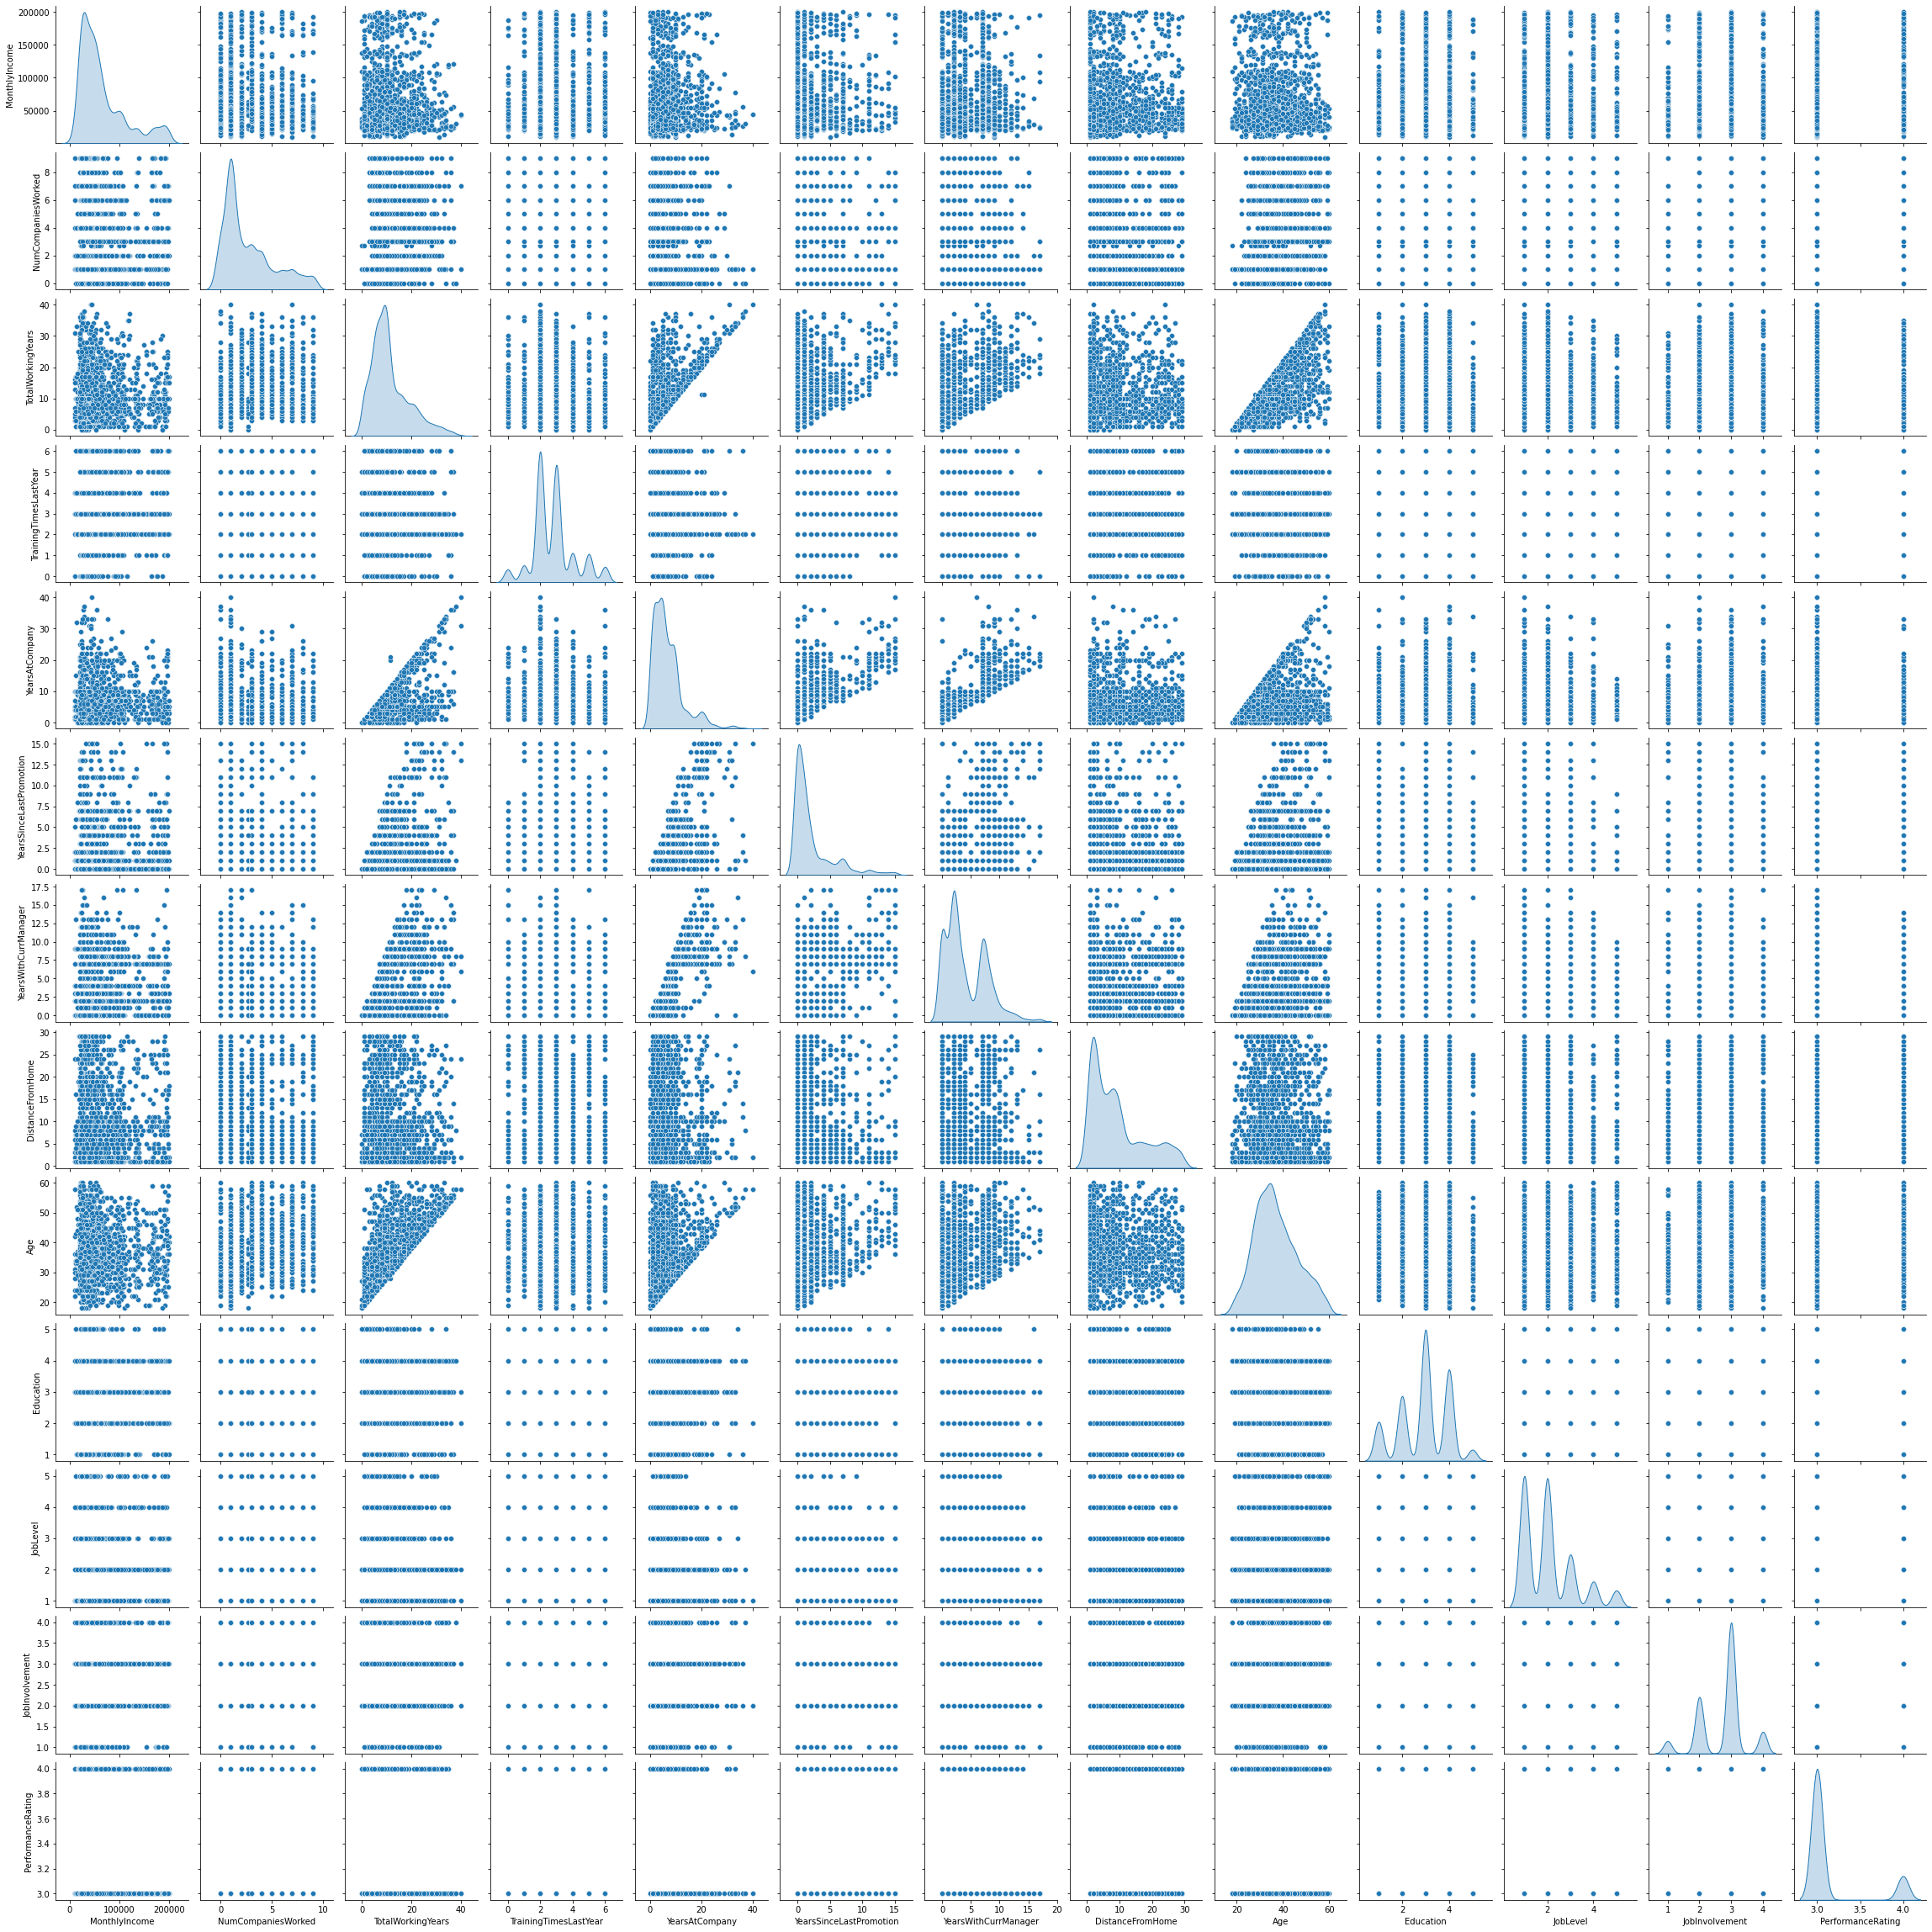

In [ ]:
hr_num=main_data[[ 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'DistanceFromHome','Age','Education','JobLevel','JobInvolvement','PerformanceRating']]

sns.pairplot(hr_num, diag_kind='kde')
plt.show()

# Chọn các feature chính

In [ ]:
#encode cột attrition với yes=1 và no=0
main_data['Attrition'] = main_data['Attrition'].replace({'Yes': 1, "No": 0})
main_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


In [ ]:
main_data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
main_data['BusinessTravel'] = main_data['BusinessTravel'].replace({'Non-Travel': 0, "Travel_Rarely": 1, "Travel_Frequently": 2})

In [ ]:
main_data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [ ]:
main_data['Department'] = main_data['Department'].replace({'Human Resources': 1, "Research & Development": 2, "Sales": 3})

In [ ]:
main_data.drop(['JobRole',
                'EducationField'],axis=1, inplace= True)

In [ ]:
main_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
main_data['Gender'] = main_data['Gender'].replace({'Female': 0, "Male": 1})

In [ ]:
main_data['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [ ]:
main_data['MaritalStatus'] = main_data['MaritalStatus'].replace({'Single': 0, "Married": 1,'Divorced':2})

In [ ]:
main_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,Gender,JobLevel,MaritalStatus,MonthlyIncome,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0,1,3,6,2,0,1,1,131160,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,1,2,2,10,1,0,1,0,41890,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,0,2,2,17,4,1,4,1,193280,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,0,0,2,2,5,1,3,1,83210,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,0,1,2,10,1,1,1,0,23420,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


# Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = main_data.drop(['Attrition'], axis=1)

X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,Gender,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,1,3,6,2,0,1,1,131160,1.0,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,2,2,10,1,0,1,0,41890,0.0,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,2,2,17,4,1,4,1,193280,1.0,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,0,2,2,5,1,3,1,83210,3.0,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,1,2,10,1,1,1,0,23420,4.0,9.0,2,6,0,4,3,3,4.0,1.0,3.0


In [ ]:
# Putting response variable to y
y = main_data['Attrition']

y.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3087, 20) (3087,)
Test set: (1323, 20) (1323,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[[ 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'DistanceFromHome','Age',]] = scaler.fit_transform(X_train[[ 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'DistanceFromHome','Age',]])

X_train.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,Gender,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
537,0.030760,1,2,-0.283046,4,1,4,2,0.152540,-0.289809,-0.415750,2.444365,-0.982464,-0.690579,-1.160407,2,4,4.0,4.0,3.0
1881,0.250309,1,2,0.085061,4,0,4,1,0.056813,1.716415,-0.415750,0.128532,-0.818401,-0.065779,-0.599245,3,3,4.0,1.0,1.0
2367,0.250309,1,3,-0.896558,4,1,1,2,0.178452,-1.092298,0.006765,1.672421,0.494102,-0.690579,0.803659,3,3,3.0,3.0,3.0
3619,0.250309,1,3,2.416405,1,0,1,2,-0.207879,1.315170,1.258854,0.128532,1.970667,3.995420,-0.599245,3,3,3.0,2.0,3.0
1398,0.360084,1,2,0.207763,3,0,2,1,0.122987,-0.691053,1.258854,-0.643412,2.134730,2.121020,1.364821,3,4,4.0,3.0,3.0


# Modelling

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
y_pred = LR.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_prob = LR.predict_proba(X_test)
y_pred_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[   0  198]
 [   0 1125]]


Confusion matrix, without normalization
[[   0  198]
 [   0 1125]]


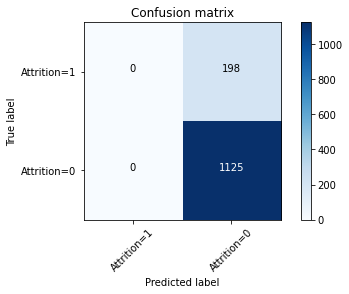

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attrition=1','Attrition=0'],normalize= False,  title='Confusion matrix')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1125
           1       0.00      0.00      0.00       198

    accuracy                           0.85      1323
   macro avg       0.43      0.50      0.46      1323
weighted avg       0.72      0.85      0.78      1323



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
logis = LogisticRegression()
logis.fit(X_train,y_train)
y_pred_logis=logis.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(y_test,y_pred_logis).round(13)
print(accuracy_lr)
f1_lr = f1_score(y_test, y_pred_logis)
print(f1_lr)

0.8503401360544
0.0


Độ chính xác của model Logistic Regression là 0.85

## Naive Bayes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.multiclass import unique_labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
(y_test != y_pred).sum()

336

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 2205 points : 336


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy_nb = accuracy_score(y_test, y_pred)
print(accuracy_nb)
f1_nb = f1_score(y_test, y_pred)
print(f1_nb)

0.8476190476190476
0.2293577981651376


Độ chính xác của Naives Bayes là 0.8476

## Decision Tree

In [ ]:
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
print(X_trainset.shape)
print(y_trainset.shape)

(3087, 20)
(3087,)


In [ ]:
print(X_testset.shape)
print(y_testset.shape)

(1323, 20)
(1323,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
predTree = drugTree.predict(X_testset)

In [ ]:
print(predTree[0:5])
print(y_testset[0:5])

[0 0 0 0 0]
4074    0
3444    1
2973    0
456     0
685     0
Name: Attrition, dtype: int64


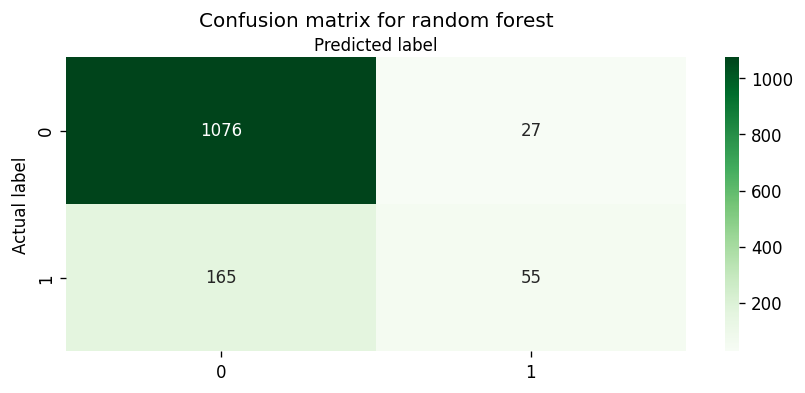

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_testset, predTree)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [ ]:
from sklearn import tree
from sklearn.datasets import load_iris

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

[Text(0.2804763856738683, 0.975, 'TotalWorkingYears <= 1.5\ngini = 0.27\nsamples = 4410\nvalue = [3699, 711]\nclass = 0'),
 Text(0.06893004115226338, 0.925, 'BusinessTravel <= 1.5\ngini = 0.5\nsamples = 275\nvalue = [141, 134]\nclass = 0'),
 Text(0.043209876543209874, 0.875, 'Age <= 26.5\ngini = 0.485\nsamples = 230\nvalue = [135, 95]\nclass = 0'),
 Text(0.02263374485596708, 0.825, 'Education <= 2.5\ngini = 0.489\nsamples = 120\nvalue = [51, 69]\nclass = 1'),
 Text(0.012345679012345678, 0.775, 'MonthlyIncome <= 176515.0\ngini = 0.278\nsamples = 36\nvalue = [6, 30]\nclass = 1'),
 Text(0.00823045267489712, 0.725, 'DistanceFromHome <= 21.0\ngini = 0.165\nsamples = 33\nvalue = [3, 30]\nclass = 1'),
 Text(0.00411522633744856, 0.675, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]\nclass = 1'),
 Text(0.012345679012345678, 0.675, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(0.01646090534979424, 0.725, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(0.03292181069958848,

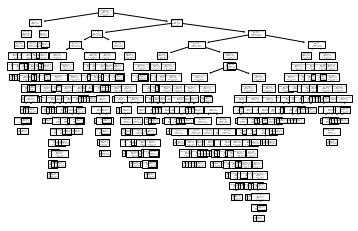

In [ ]:
tree.plot_tree(clf,feature_names=['Age'	,'BusinessTravel',	'Department',	'DistanceFromHome',	'Education',	'Gender',	
                                  'JobLevel',	'MaritalStatus',	'MonthlyIncome',	'NumCompaniesWorked',	'TotalWorkingYears',	
                                  'TrainingTimesLastYear',	'YearsAtCompany',	'YearsSinceLastPromotion',	'YearsWithCurrManager',
                                  'JobInvolvement',	'PerformanceRating',	'EnvironmentSatisfaction',	'JobSatisfaction',	
                                  'WorkLifeBalance'], class_names=['0','1','2','3','4','5','6','7','8','9','10'])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=4)
decision_tree = decision_tree.fit(X, y)
r = export_text(decision_tree, feature_names=['Age'	,'BusinessTravel',	'Department',	'DistanceFromHome',	'Education',	'Gender',	
                                  'JobLevel',	'MaritalStatus',	'MonthlyIncome',	'NumCompaniesWorked',	'TotalWorkingYears',	
                                  'TrainingTimesLastYear',	'YearsAtCompany',	'YearsSinceLastPromotion',	'YearsWithCurrManager',
                                  'JobInvolvement',	'PerformanceRating',	'EnvironmentSatisfaction',	'JobSatisfaction',	
                                  'WorkLifeBalance'])
print(r)

|--- TotalWorkingYears <= 1.50
|   |--- BusinessTravel <= 1.50
|   |   |--- Age <= 26.50
|   |   |   |--- Education <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- Education >  2.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  26.50
|   |   |   |--- JobInvolvement <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- JobInvolvement >  1.50
|   |   |   |   |--- class: 0
|   |--- BusinessTravel >  1.50
|   |   |--- Age <= 34.50
|   |   |   |--- MaritalStatus <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- MaritalStatus >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  34.50
|   |   |   |--- class: 0
|--- TotalWorkingYears >  1.50
|   |--- MaritalStatus <= 0.50
|   |   |--- Age <= 33.50
|   |   |   |--- JobSatisfaction <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- JobSatisfaction >  3.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  33.50
|   |   |   |--- JobSatisfaction <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- JobSatisfaction >  1.50

In [ ]:
import graphviz

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Attrition")

'Attrition.pdf'

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['Age'	,'BusinessTravel',	'Department',	'DistanceFromHome',	'Education',	'Gender',	
                                  'JobLevel',	'MaritalStatus',	'MonthlyIncome',	'NumCompaniesWorked',	'TotalWorkingYears',	
                                  'TrainingTimesLastYear',	'YearsAtCompany',	'YearsSinceLastPromotion',	'YearsWithCurrManager',
                                  'JobInvolvement',	'PerformanceRating',	'EnvironmentSatisfaction',	'JobSatisfaction',	
                                  'WorkLifeBalance'],class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'],filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data) 

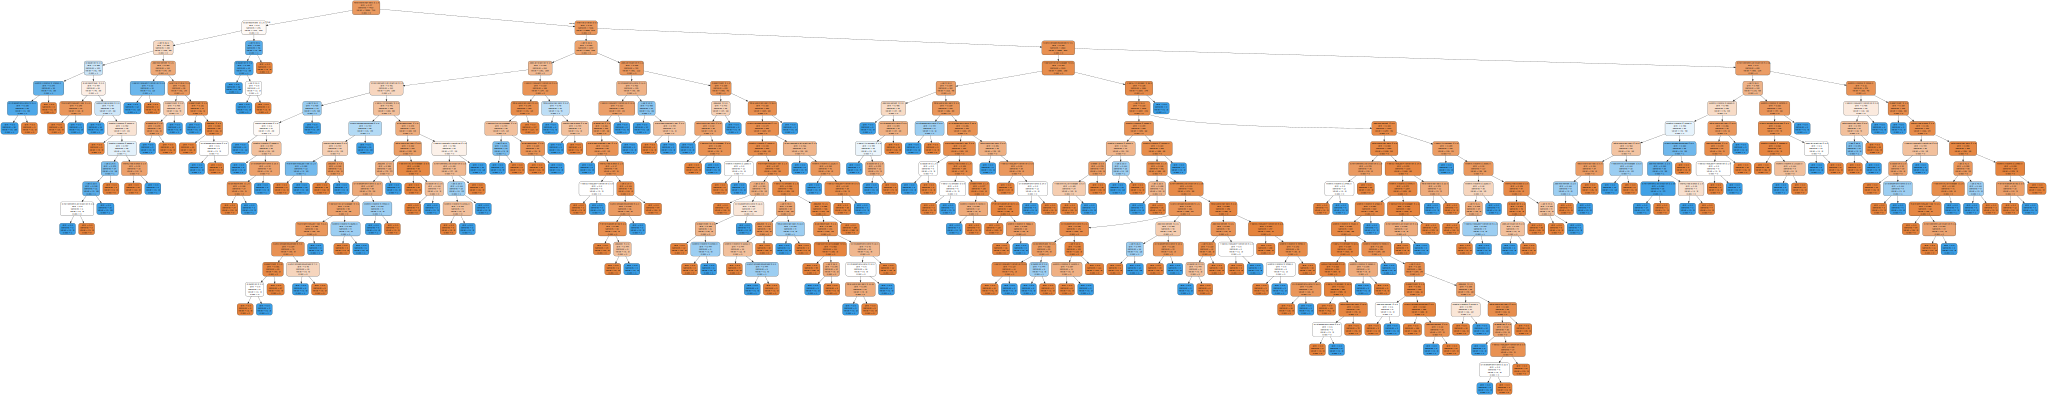

In [ ]:
graph

In [ ]:
y_pred = predTree

In [ ]:
loanTree = DecisionTreeClassifier(criterion="entropy")
loanTree.fit(X_train, y_train)
predTree = loanTree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1865
           1       0.78      0.79      0.79       340

    accuracy                           0.93      2205
   macro avg       0.87      0.88      0.87      2205
weighted avg       0.93      0.93      0.93      2205



In [ ]:
accuracy_dt = accuracy_score(y_test, predTree)
print(accuracy_dt)
f1_dt = f1_score(y_test, predTree)
print(f1_dt)

0.9337868480725624
0.7871720116618075


Độ chính xác của model Decision Tree là 0.93

## Random Forest

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score


In [ ]:
label=main_data['Attrition']
features=main_data.drop(['Attrition'],axis=1)
features_t,features_v,label_t,label_v=train_test_split(features,label,train_size=0.5)

In [ ]:
#%%
rfc=RandomForestClassifier()
rfc.fit(features_t,label_t)
y_pred=rfc.predict(features_v)
accuracy_rf = accuracy_score(label_v,y_pred)
print(accuracy_rf)
print("recall:",recall_score(label_v,y_pred))
f1_rf = f1_score(label_v,y_pred)
print(f1_rf)

0.9659863945578231
recall: 0.8056338028169014
0.884080370942813


In [ ]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_v, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1844    6]
 [  69  286]]

True Positives(TP) =  1844

True Negatives(TN) =  286

False Positives(FP) =  6

False Negatives(FN) =  69


Text(0.5, 15.0, 'Predicted label')

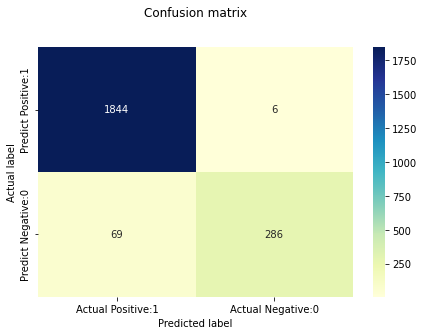

In [ ]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_v, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1850
           1       0.98      0.81      0.88       355

    accuracy                           0.97      2205
   macro avg       0.97      0.90      0.93      2205
weighted avg       0.97      0.97      0.96      2205



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #kNN classifier
from sklearn.model_selection import train_test_split #train and test sets 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(10, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 20}


In [ ]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       932
           1       0.36      0.02      0.04       171

    accuracy                           0.84      1103
   macro avg       0.61      0.51      0.48      1103
weighted avg       0.77      0.84      0.78      1103



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of K Nearest Neighbor is:", 100 * accuracy_score(y_test, y_predict_knn), '%')

Accuracy of K Nearest Neighbor is: 84.22484134179511 %


In [ ]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 83.70%


In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X, y)

y_test_hat=knn.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 84.86%


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy_knn = accuracy_score(y_test, y_pred)
print(accuracy_knn)
f1_knn = f1_score(y_test, y_pred)
print(f1_knn)

0.8422484134179511
0.04395604395604395


## SVC

In [ ]:
main_data.shape

(4410, 21)

In [ ]:
main_data[['Age'	,'BusinessTravel',	'Department',	'DistanceFromHome',	'Education',	'Gender',	
                                  'JobLevel',	'MaritalStatus',	'MonthlyIncome',	'NumCompaniesWorked',	'TotalWorkingYears',	
                                  'TrainingTimesLastYear',	'YearsAtCompany',	'YearsSinceLastPromotion',	'YearsWithCurrManager',
                                  'JobInvolvement',	'PerformanceRating',	'EnvironmentSatisfaction',	'JobSatisfaction',	
                                  'WorkLifeBalance']] = main_data[['Age'	,'BusinessTravel',	'Department',	'DistanceFromHome',	'Education',	'Gender',	
                                  'JobLevel',	'MaritalStatus',	'MonthlyIncome',	'NumCompaniesWorked',	'TotalWorkingYears',	
                                  'TrainingTimesLastYear',	'YearsAtCompany',	'YearsSinceLastPromotion',	'YearsWithCurrManager',
                                  'JobInvolvement',	'PerformanceRating',	'EnvironmentSatisfaction',	'JobSatisfaction',	
                                  'WorkLifeBalance']].astype(float)
main_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,Gender,JobLevel,MaritalStatus,MonthlyIncome,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51.0,0,1.0,3.0,6.0,2.0,0.0,1.0,1.0,131160.0,...,1.0,6.0,1.0,0.0,0.0,3.0,3.0,3.0,4.0,2.0
1,31.0,1,2.0,2.0,10.0,1.0,0.0,1.0,0.0,41890.0,...,6.0,3.0,5.0,1.0,4.0,2.0,4.0,3.0,2.0,4.0
2,32.0,0,2.0,2.0,17.0,4.0,1.0,4.0,1.0,193280.0,...,5.0,2.0,5.0,0.0,3.0,3.0,3.0,2.0,2.0,1.0
3,38.0,0,0.0,2.0,2.0,5.0,1.0,3.0,1.0,83210.0,...,13.0,5.0,8.0,7.0,5.0,2.0,3.0,4.0,4.0,3.0
4,32.0,0,1.0,2.0,10.0,1.0,1.0,1.0,0.0,23420.0,...,9.0,2.0,6.0,0.0,4.0,3.0,3.0,4.0,1.0,3.0


Text(0, 0.5, 'MaritalStatus')

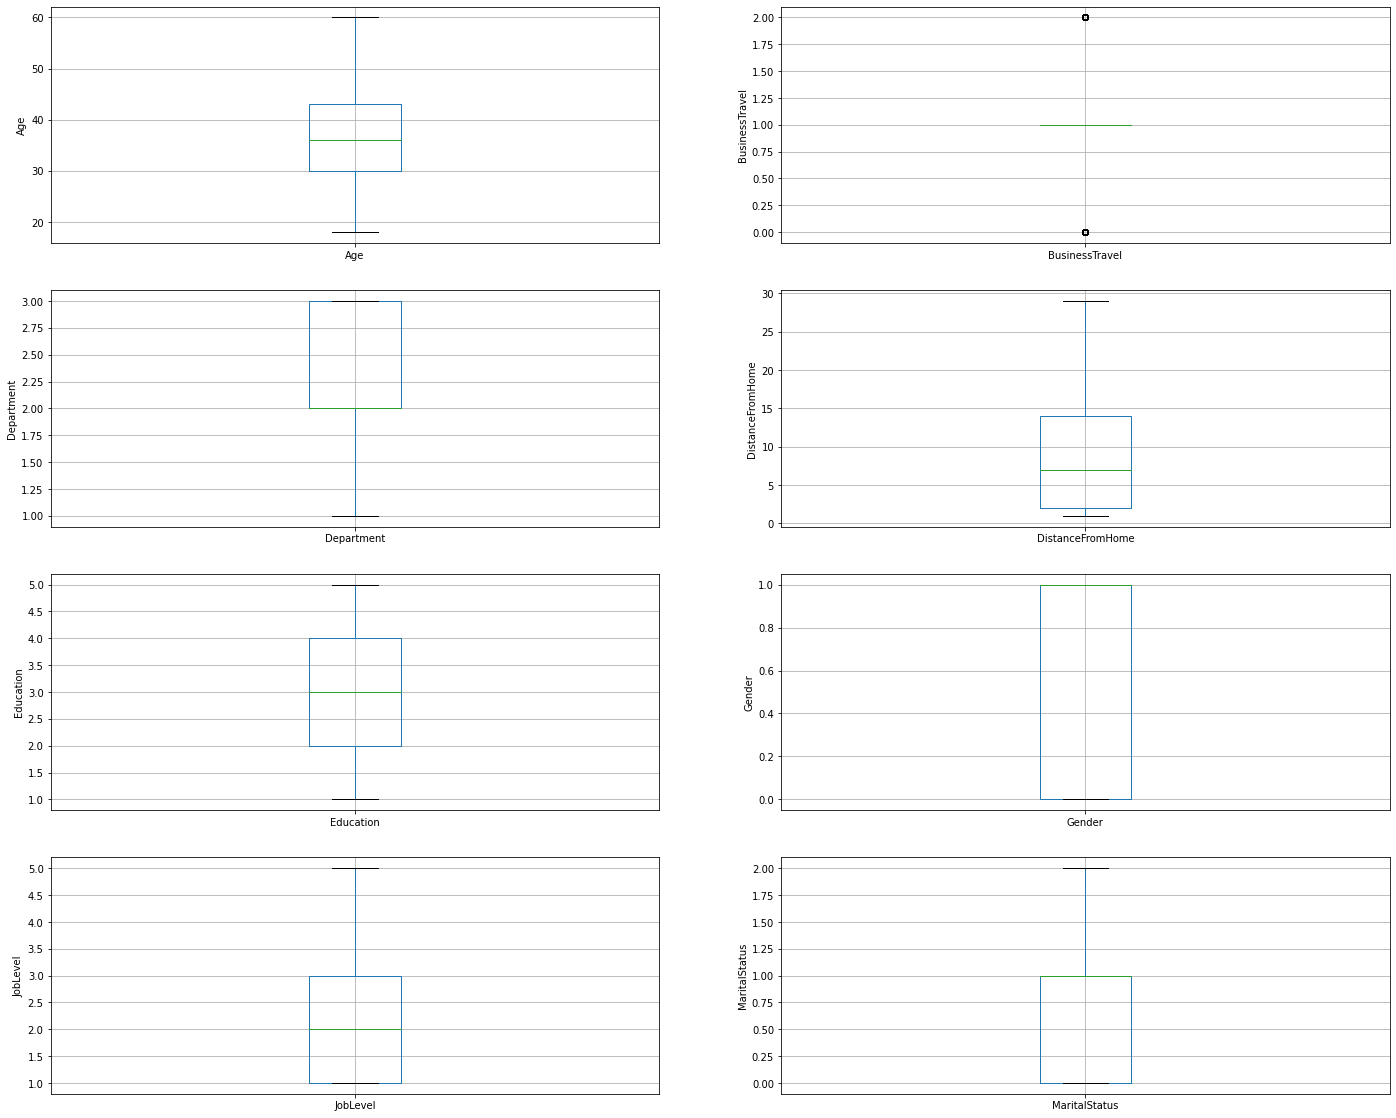

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = main_data.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')


plt.subplot(4, 2, 2)
fig = main_data.boxplot(column='BusinessTravel')
fig.set_title('')
fig.set_ylabel('BusinessTravel')


plt.subplot(4, 2, 3)
fig = main_data.boxplot(column='Department')
fig.set_title('')
fig.set_ylabel('Department')


plt.subplot(4, 2, 4)
fig = main_data.boxplot(column='DistanceFromHome')
fig.set_title('')
fig.set_ylabel('DistanceFromHome')


plt.subplot(4, 2, 5)
fig = main_data.boxplot(column='Education')
fig.set_title('')
fig.set_ylabel('Education')


plt.subplot(4, 2, 6)
fig = main_data.boxplot(column='Gender')
fig.set_title('')
fig.set_ylabel('Gender')


plt.subplot(4, 2, 7)
fig = main_data.boxplot(column='JobLevel')
fig.set_title('')
fig.set_ylabel('JobLevel')


plt.subplot(4, 2, 8)
fig = main_data.boxplot(column='MaritalStatus')
fig.set_title('')
fig.set_ylabel('MaritalStatus')


Text(0, 0.5, 'JobInvolvement')

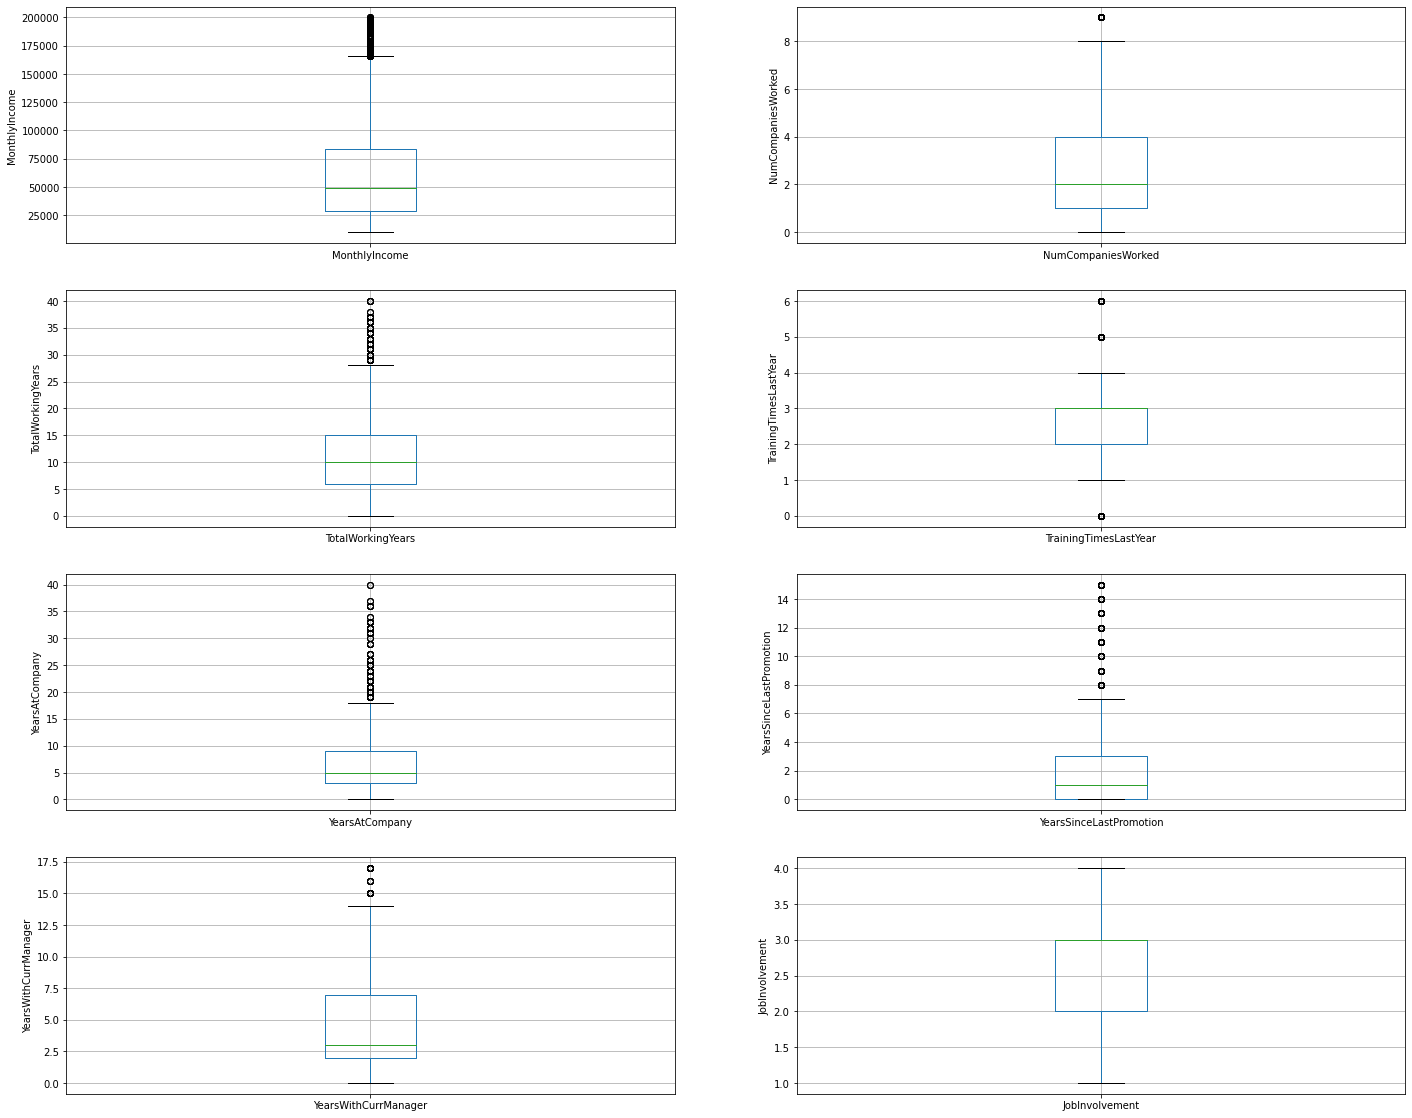

In [ ]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = main_data.boxplot(column='MonthlyIncome')
fig.set_title('')
fig.set_ylabel('MonthlyIncome')


plt.subplot(4, 2, 2)
fig = main_data.boxplot(column='NumCompaniesWorked')
fig.set_title('')
fig.set_ylabel('NumCompaniesWorked')


plt.subplot(4, 2, 3)
fig = main_data.boxplot(column='TotalWorkingYears')
fig.set_title('')
fig.set_ylabel('TotalWorkingYears')


plt.subplot(4, 2, 4)
fig = main_data.boxplot(column='TrainingTimesLastYear')
fig.set_title('')
fig.set_ylabel('TrainingTimesLastYear')


plt.subplot(4, 2, 5)
fig = main_data.boxplot(column='YearsAtCompany')
fig.set_title('')
fig.set_ylabel('YearsAtCompany')


plt.subplot(4, 2, 6)
fig = main_data.boxplot(column='YearsSinceLastPromotion')
fig.set_title('')
fig.set_ylabel('YearsSinceLastPromotion')


plt.subplot(4, 2, 7)
fig = main_data.boxplot(column='YearsWithCurrManager')
fig.set_title('')
fig.set_ylabel('YearsWithCurrManager')


plt.subplot(4, 2, 8)
fig = main_data.boxplot(column='JobInvolvement')
fig.set_title('')
fig.set_ylabel('JobInvolvement')

Text(0, 0.5, 'WorkLifeBalance')

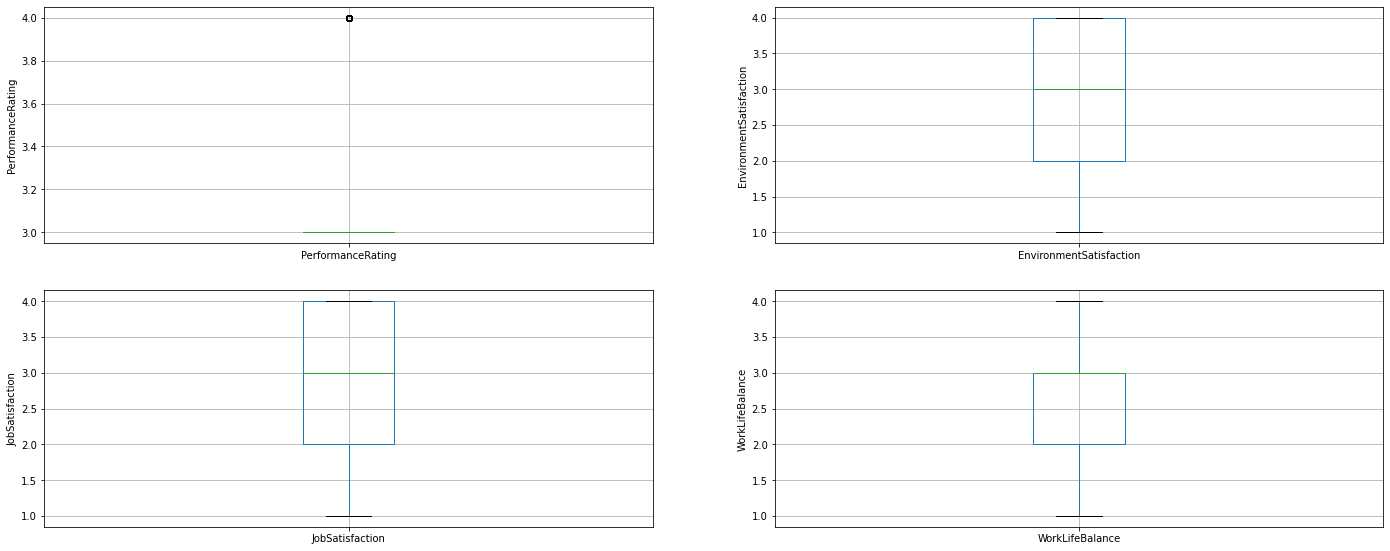

In [ ]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = main_data.boxplot(column='PerformanceRating')
fig.set_title('')
fig.set_ylabel('PerformanceRating')


plt.subplot(4, 2, 2)
fig = main_data.boxplot(column='EnvironmentSatisfaction')
fig.set_title('')
fig.set_ylabel('EnvironmentSatisfaction')


plt.subplot(4, 2, 3)
fig = main_data.boxplot(column='JobSatisfaction')
fig.set_title('')
fig.set_ylabel('JobSatisfaction')


plt.subplot(4, 2, 4)
fig = main_data.boxplot(column='WorkLifeBalance')
fig.set_title('')
fig.set_ylabel('WorkLifeBalance')

In [ ]:
X = main_data.drop(['Attrition'], axis=1)
y = main_data['Attrition']

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3528, 20) (3528,)
Test set: (882, 20) (882,)


In [ ]:
# Feature Scaling
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,Age,BusinessTravel,Department,DistanceFromHome,Education,Gender,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,3.528000e+03,3.528000e+03,3.528000e+03,3.528000e+03,3.528000e+03,3.528000e+03,3.528000e+03,3.528000e+03,3.528000e+03,3.528000e+03,3.528000e+03,3.528000e+03,3.528000e+03,3.528000e+03,3.528000e+03,3.528000e+03,3.528000e+03,3.528000e+03,3.528000e+03,3.528000e+03
mean,2.900174e-16,6.520357e-17,-2.482267e-16,7.451837e-17,1.339317e-16,5.085375e-17,-1.812609e-17,1.007005e-16,-6.847634e-17,-1.591068e-16,-9.616898e-17,1.208406e-16,-6.847634e-17,3.222416e-17,-8.861644e-17,1.132881e-17,4.632223e-16,2.235551e-16,-4.028020e-17,1.389667e-16
std,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00
min,-2.069467e+00,-2.023526e+00,-2.372937e+00,-1.020063e+00,-1.879315e+00,-1.224166e+00,-9.656557e-01,-1.238236e+00,-1.165565e+00,-1.081011e+00,-1.446428e+00,-2.185332e+00,-1.131204e+00,-6.715990e-01,-1.146929e+00,-2.429037e+00,-4.283637e-01,-1.580148e+00,-1.563040e+00,-2.485200e+00
25%,-7.502332e-01,-1.551670e-01,-4.886873e-01,-8.963423e-01,-8.957483e-01,-1.224166e+00,-9.656557e-01,-1.238236e+00,-7.614367e-01,-6.827897e-01,-6.731037e-01,-6.306132e-01,-6.432808e-01,-6.715990e-01,-5.831718e-01,-1.020483e+00,-4.283637e-01,-6.650466e-01,-6.575073e-01,-1.070767e+00
50%,-9.061630e-02,-1.551670e-01,-4.886873e-01,-2.777399e-01,8.781846e-02,8.168824e-01,-6.150673e-02,1.389697e-01,-3.373357e-01,-2.845688e-01,-1.575539e-01,1.467465e-01,-3.179985e-01,-3.606948e-01,-3.012935e-01,3.880710e-01,-4.283637e-01,2.500552e-01,2.480257e-01,3.436654e-01
75%,6.789367e-01,-1.551670e-01,1.395563e+00,5.883036e-01,1.071385e+00,8.168824e-01,8.426423e-01,1.389697e-01,3.933674e-01,5.118730e-01,4.868833e-01,1.467465e-01,3.325661e-01,-4.979051e-02,8.262200e-01,3.880710e-01,-4.283637e-01,1.165157e+00,1.153559e+00,3.436654e-01
max,2.547851e+00,1.713192e+00,1.395563e+00,2.444111e+00,2.054952e+00,8.168824e-01,2.650940e+00,1.516175e+00,2.869344e+00,2.502978e+00,3.709069e+00,2.478825e+00,5.374442e+00,3.991965e+00,3.645004e+00,1.796625e+00,2.334465e+00,1.165157e+00,1.153559e+00,1.758098e+00


In [ ]:
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8957


In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 

# fit classifier to training set
linear_svc.fit(X_train,y_train)

# make predictions on test set
y_pred_test=linear_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.8356


In [ ]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8396


In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.8396
Test set score: 0.8356


In [ ]:
# check class distribution in test set
y_test.value_counts()

0    737
1    145
Name: Attrition, dtype: int64

In [ ]:
# check null accuracy score
null_accuracy = (3306/(3306+274))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 

# fit classifier to training set
poly_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=poly_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.9048


In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 

# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=1.0 : 0.8027


In [ ]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[737   0]
 [145   0]]

True Positives(TP) =  737

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  145


<Axes: >

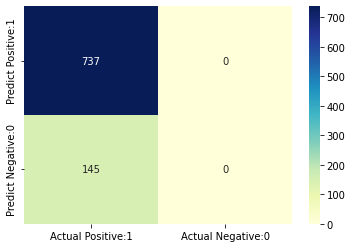

In [ ]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       737
           1       0.00      0.00      0.00       145

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.70      0.84      0.76       882



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
TP = cm[1,1]
TN = cm[0,1]
FP = cm[1,0]
FN = cm[0,1]

In [ ]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.0000


In [ ]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 1.0000


In [ ]:
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.0000


In [ ]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : nan


<ipython-input-648-edb79a1ce5b6>:1: RuntimeWarning: invalid value encountered in true_divide
  recall = TP / float(TP + FN)


In [ ]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : nan


<ipython-input-649-1371fddf8ea5>:1: RuntimeWarning: invalid value encountered in true_divide
  true_positive_rate = TP / float(TP + FN)


In [ ]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 1.0000


In [ ]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.0000


In [ ]:
accuracy_svc = accuracy_score(y_test, y_pred_test)
print(accuracy_svc)
f1_svc = f1_score(y_test, y_pred_test).round(13)
print(f1_svc)

0.8356009070294784
0.0


# Boosing

## Gradient Boosting

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score


In [ ]:
label=main_data['Attrition']
features=main_data.drop(['Attrition'],axis=1)
features_t,features_v,label_t,label_v=train_test_split(features,label,train_size=0.8)

In [ ]:
#%%
rfc=RandomForestClassifier()
rfc.fit(features_t,label_t)
y_pred=rfc.predict(features_v)
print("accuracy_rf:",accuracy_score(label_v,y_pred))
print("recall:",recall_score(label_v,y_pred))
print("f1_rf:",f1_score(label_v,y_pred))

accuracy_rf: 0.9931972789115646
recall: 0.9617834394904459
f1_rf: 0.9805194805194806


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier()
gbt.fit(features_t, label_t)
y_pred = gbt.predict(features_v)

accuracy_gbt = accuracy_score(label_v, y_pred)
f1_gbt = f1_score(label_v, y_pred)

print(accuracy_gbt, f1_gbt)

0.8752834467120182 0.4660194174757281


## XGBClassifier

In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier()
xgb.fit(features_t, label_t)
y_pred = xgb.predict(features_v)

accuracy_xgb = accuracy_score(label_v, y_pred)
f1_xgb = f1_score(label_v, y_pred)

print(accuracy_xgb, f1_xgb)


0.9920634920634921 0.9771986970684039


## SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(features_t, label_t)
y_pred = sgd.predict(features_v)

accuracy_sgd = accuracy_score(label_v, y_pred)
f1_sgd = f1_score(label_v, y_pred)

print(accuracy_sgd, f1_sgd)

0.8219954648526077 0.0


# Kết luận

In [ ]:
models = pd.DataFrame({
    'Model': ['Random Forest', 
              'KNN', 
              'Decision Tree', 
              'Logistic Regression', 
              'SVC',
              'SGD',
              'XGB',
              'GradientBoosting'
                ],
    'F1_Score': [f1_rf,
                 f1_knn,
                 f1_dt,
                 f1_lr,
                 f1_svc,
                 f1_sgd,
                 f1_xgb,
                 f1_gbt
              ],
      'Accuracy':[accuracy_rf,
                 accuracy_knn,
                 accuracy_dt,
                 accuracy_lr,
                 accuracy_svc,
                 accuracy_sgd,
                 accuracy_sgd,
                 accuracy_gbt]})
models.sort_values(by='Accuracy', ascending=False)

,Model,F1_Score,Accuracy
0,Random Forest,0.978261,0.993197
2,Decision Tree,0.787172,0.933787
7,GradientBoosting,0.466019,0.875283
3,Logistic Regression,0.000000,0.850340
1,KNN,0.043956,0.842248
4,SVC,0.000000,0.835601
5,SGD,0.000000,0.821995
6,XGB,0.977199,0.821995


In [ ]:
#: ---------------------------------------------------------------------------------------------------------------------Đánh giá mô hình hồi quy (biến liên tục) sử dụng một số chỉ số đánh giá 
#1: ---------------------------------------------------------------------------------------------------------------------Mean Absolute Error (MAE)
from sklearn.metrics import mean_squared_error
# true values for the target variable
y_true = [1, 2, 3, 4, 5]
# predicted values for the target variable
y_pred = [0.9, 2.1, 2.9, 4.1, 4.9]
# calculate the mean squared error
mse = mean_squared_error(y_true, y_pred)
print('mse:', mse)  # Output: 0.18
#2: ---------------------------------------------------------------------------------------------------------------------Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
# true values for the target variable
y_true = [1, 2, 3, 4, 5]
# predicted values for the target variable
y_pred = [0.9, 2.1, 2.9, 4.1, 4.9]
# calculate the mean squared error
mse = mean_squared_error(y_true, y_pred)
print('mse:', mse)  # Output: 0.18
#3: ---------------------------------------------------------------------------------------------------------------------Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
import math
# true values for the target variable
y_true = [1, 2, 3, 4, 5]
# predicted values for the target variable
y_pred = [0.9, 2.1, 2.9, 4.1, 4.9]
# calculate the mean squared error
mse = mean_squared_error(y_true, y_pred)
# calculate the root mean squared error
rmse = math.sqrt(mse)
print('rmse:', rmse)  # Output: 0.424264
#4: ---------------------------------------------------------------------------------------------------------------------R-squared
from sklearn.metrics import r2_score
# true values for the target variable
y_true = [1, 2, 3, 4, 5]
# predicted values for the target variable
y_pred = [0.9, 2.1, 2.9, 4.1, 4.9]
# calculate the R-squared
r2 = r2_score(y_true, y_pred)
print('r2:', r2)  # Output: 0.97
#5: ---------------------------------------------------------------------------------------------------------------------Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# true values for the target variable
y_true = [1, 2, 3, 4, 5]

# predicted values for the target variable
y_pred = [0.9, 2.1, 2.9, 4.1, 4.9]

# calculate the mean absolute percentage error
mape = mean_absolute_percentage_error(y_true, y_pred)
print('mape:', mape)  # Output: 6.0

mse: 0.009999999999999976
mse: 0.009999999999999976
rmse: 0.09999999999999988
r2: 0.995
mape: 4.566666666666665


In [ ]:
#: ---------------------------------------------------------------------------------------------------------------------Đánh giá mô hình phân loại (biến rời rạc) sử dụng một số chỉ số đánh giá 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [ ]:
#1: ---------------------------------------------------------------------------------------------------------------------Accuracy_score (Phần trăm dự đoán đúng)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9668934240362812

In [ ]:
#2: ---------------------------------------------------------------------------------------------------------------------In ra báo cáo đánh giá của mô hình (f1 score)
from sklearn import metrics
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
metrics.accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1865
           1       0.99      0.79      0.88       340

    accuracy                           0.97      2205
   macro avg       0.98      0.90      0.93      2205
weighted avg       0.97      0.97      0.97      2205



Text(0.5, 15.0, 'Predicted label')

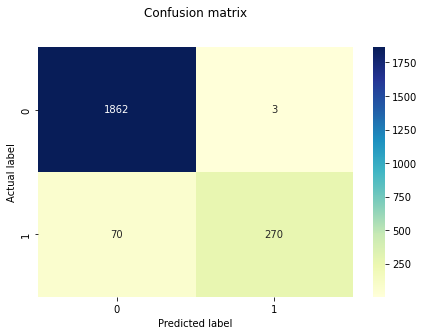

In [ ]:
#3: ---------------------------------------------------------------------------------------------------------------------#Vẽ confusion matrix (phân loại nhị phân)
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')